# Assignment 3. Frequency Domain Processing

<span style="color:orange">Ground Rules for the Assignment: </span>

* <span style="color:lightblue"> You can only use basic functions (matrix operations, input/output image functions, plotters). Anything else, you need to code from scratch (histogram functions, inverting gamma functions, color matting, histogram equalization)</span>
* <span style="color:lightblue"> The code needs to be appropiately commented and should be reproducible; if we cannot re-generate your figures from your code, we will deduct points.</span>
* <span style="color:lightblue">The notebook report should be detailed and include partial and final solutions for each exercise. We grade solely the report; code without report will not be graded, so we encourage that you invest some time on it</span>
* <span style="color:lightblue">Interactive plots are welcome but most important results should be static and generated beforehand</span>
* <span style="color:lightblue">__Remember to remove all plots from the "coding" sections.__ Only the Report should output plots and/or images.</span>


<span style="color:orange">Submission Details</span>

Simply submit this Jupyter Notebook with the report inlined as described below. The notebook should be executed before submission. Name the file as 
```surname1_name1_surname2_name2_assignment3.ipynb```


In [4]:
# Loading Libraries you will need for the assignment.- Install them in your environment if you haven't done so yet
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2 #opencv python
import time

## 1. Gaussian Filtering [10 points]
In this exercise we will be working on filtering and the connection between spatial and frequency domain filtering.
### _Tasks_

* Implement Gaussian filtering both in the spatial and frequency domains
* Demonstrate that convolving an image with a Gaussian filter with standard deviation $\sigma_s$ in the spatial domain is equivalent to point-wise multiplication in the frequency domain with Gaussian filter with standard deviation $\sigma_f = \frac{1}{2\sigma{s}\pi}$
* Analyze how the performance of equivalent filtering in spatial and temporal domains depends on the parameter $\sigma_s$

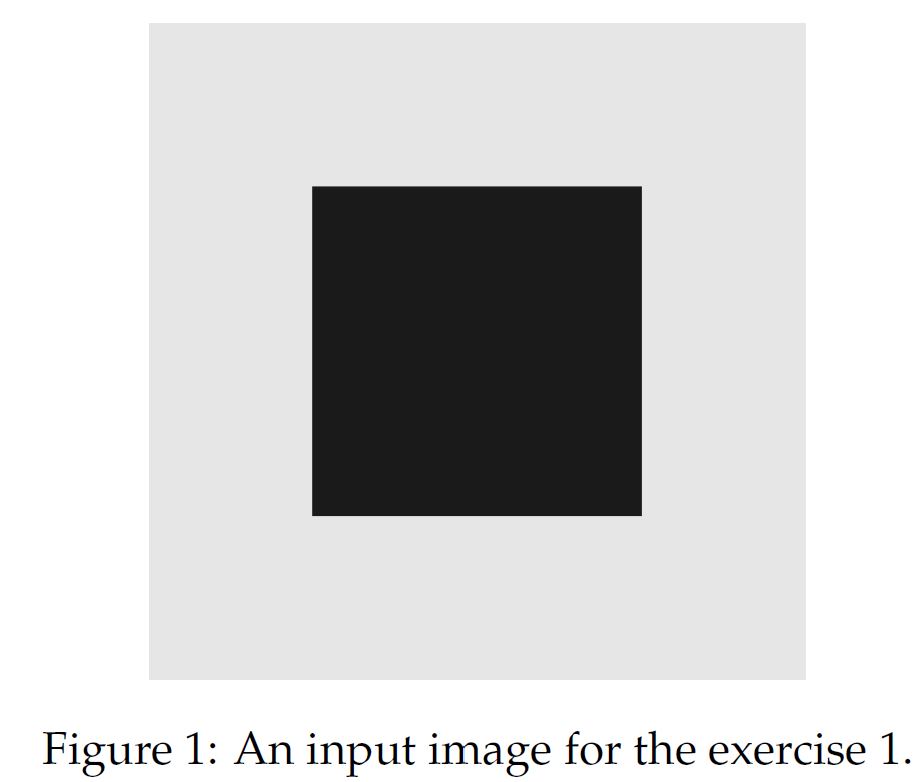

In [11]:
# Define your functions here .- you can include comments in your code explaining the steps of your algorithm

# NOTE: sigma is the standard dev
def gaussian_filter_spatial(image, sigma):
    # NOTE: Define a kernel size! remember we want a central pixel so kernel should be odd
    n = int(np.ceil(sigma) * 4 + 1)
    if n % 2 == 0:
        n += 1
    # NOTE: make the kernel 2D
    ax = np.arange(-n // 2 + 1, n // 2 + 1)
    X, Y = np.meshgrid(ax, ax)
    K = np.exp(-(X**2 + Y**2) / (2 * sigma**2))
    K /= np.sum(K)
    # NOTE: Finally convolve filter with image
    return cv2.filter2D(image, -1, K)

def gaussian_filter_frequency(image, sigma):
    rows, cols = image.shape
    # NOTE: create the Low-pass-Filter, following what teacher said
    x = np.linspace(-0.5, 0.5, cols)
    y = np.linspace(-0.5, 0.5, rows)
    X, Y = np.meshgrid(x, y)
    D = np.sqrt(X**2 + Y**2)
    D /= np.max(D)
    K = np.exp(-D**2 / (2 * sigma**2))
    K /= np.max(K)
    # NOTE: apply Fourier Transform, shift to center adn apply point-wise mul, transform back to spatial
    image_fft = np.fft.fft2(image)
    filtered_fft = image_fft * np.fft.fftshift(K)
    return np.abs(np.fft.ifft2(filtered_fft))


In [31]:
# Execute your code here
img_path = 'car.jpg'  
image = Image.open(img_path).convert('L')
image = np.array(image).astype(np.float32) / 255.0

# NOTE: formula given on the assignment above
def run_trial(sigma):
    sigma_spatial = sigma
    sigma_frequency = 1 / (2 * np.pi * sigma_spatial)

    start_spatial = time.time()
    spatial_image = gaussian_filter_spatial(image, sigma_spatial)
    end_spatial = time.time() - start_spatial 
    start_frequency = time.time()
    frequency_image = gaussian_filter_frequency(image, sigma_frequency)
    end_frequency = time.time() -  start_frequency 

    return spatial_image,frequency_image,end_spatial,end_frequency

###  <span style="color:orange"> _Report_ </span>
<span style="color:orange"> _Report your results below. As a test image for this exercise, create an image similar to the one shown in Figure 1. For filtering both spatial and frequency domains assume padding with zero values. In the report, please show examples of filtered images with different pairs of $\sigma_s$ and $\sigma_f$. In particular, include in your report
a plot of the execution time for both domains as a function of $\sigma_s$. Please inline the resulting images with your text explaining the approach (e.g. as figures) so that the report is cohesive._ </span>

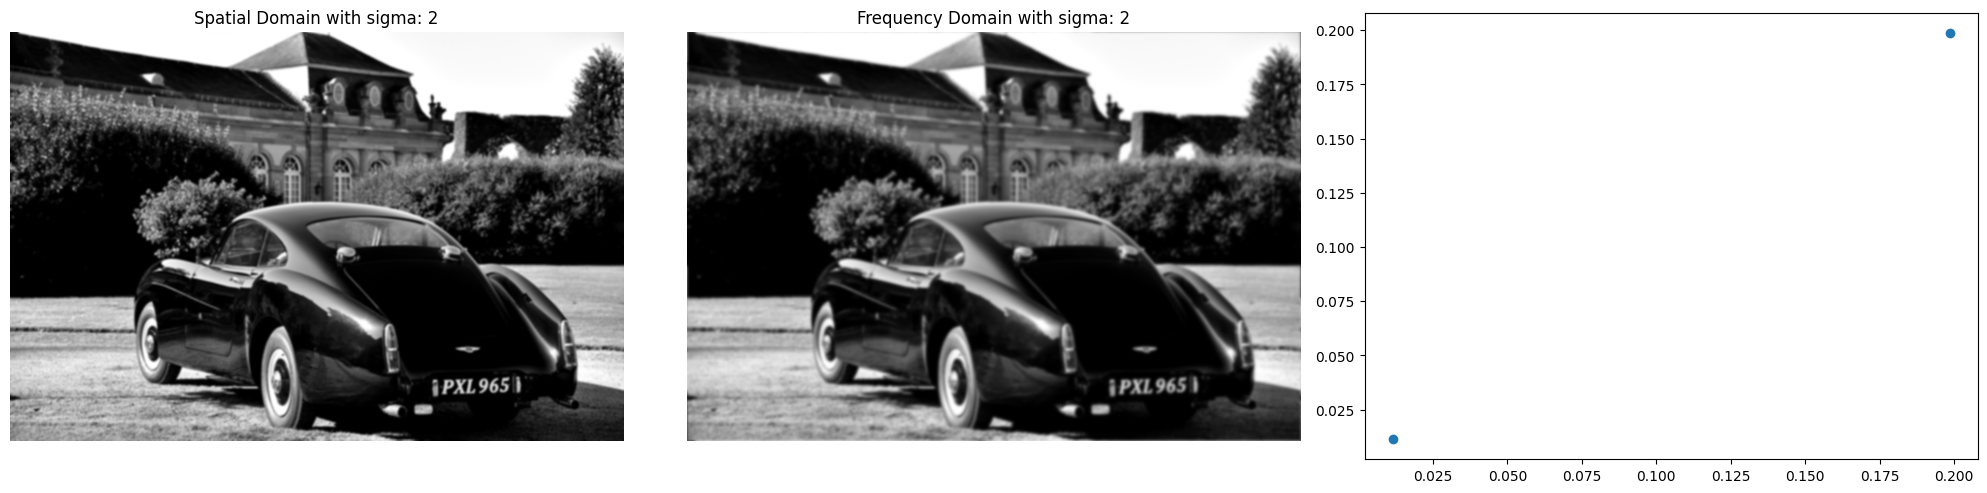

In [32]:
sigma = 2
Is,If,Ts,Tf = run_trial(sigma)
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(Is, cmap='gray')
plt.title(f'Spatial Domain with sigma: {sigma}')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(If, cmap='gray')
plt.title(f'Frequency Domain with sigma: {sigma}')
plt.axis('off')

x = [Ts, Tf]
y = [Ts, Tf] 
plt.subplot(1, 3, 3)
plt.scatter(x,y, label="Data")

plt.tight_layout()
plt.show()

In the above images we can see that with a standard deviation of 2 the images don't get too blurred, and they look very alike, even though it is possible to see a slight more blurred version in the Frequency filtered one. In terms of time execution instead the frequency filtered one takes more time than the spatial one!

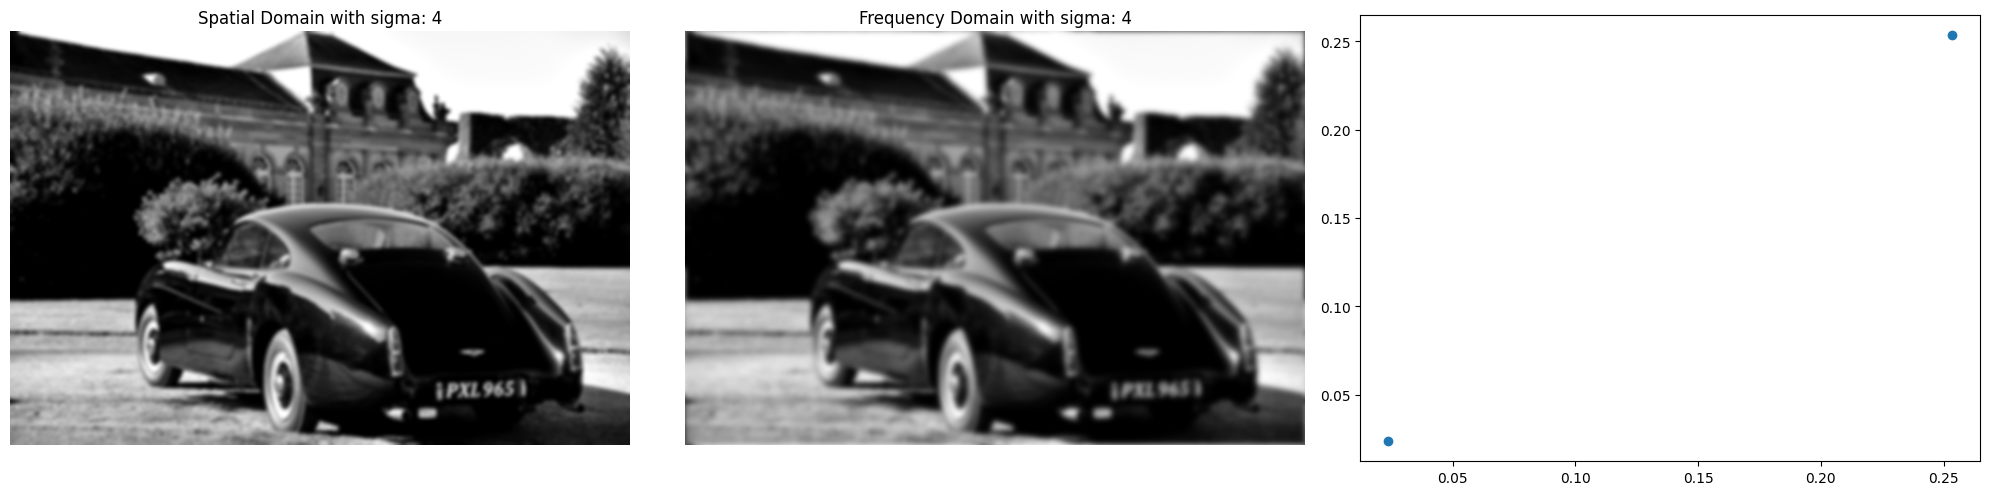

In [33]:
sigma = 4
Is,If,Ts,Tf = run_trial(sigma)
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(Is, cmap='gray')
plt.title(f'Spatial Domain with sigma: {sigma}')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(If, cmap='gray')
plt.title(f'Frequency Domain with sigma: {sigma}')
plt.axis('off')

x = [Ts, Tf]
y = [Ts, Tf] 
plt.subplot(1, 3, 3)
plt.scatter(x,y, label="Data")

plt.tight_layout()
plt.show()

Still, with a higher sigma obvioulsy the images are more blurred, they still look pretty alike even though there is a slight more blurring in the frequency one. We can now see that execution time remained almost the same for spatial and increased for the frequency one. This shows how execution time is related to sigma. 

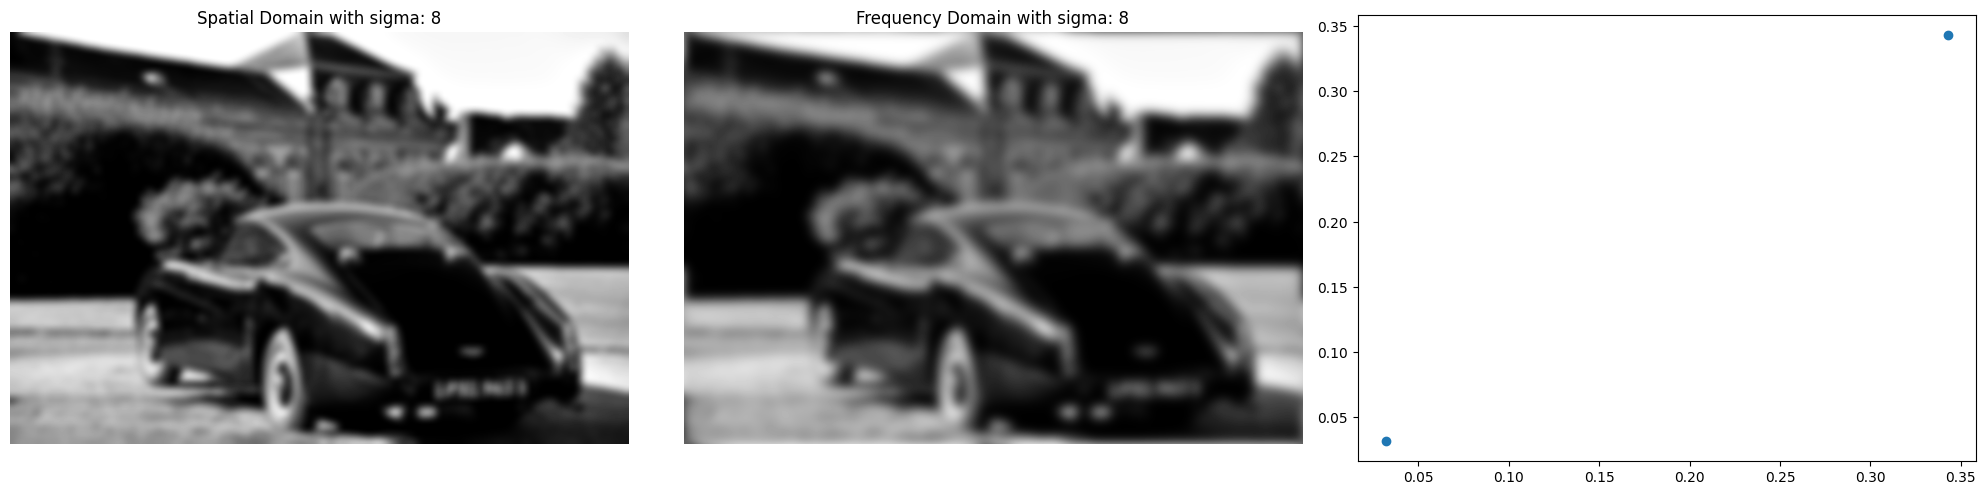

In [34]:
sigma = 8
Is,If,Ts,Tf = run_trial(sigma)
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(Is, cmap='gray')
plt.title(f'Spatial Domain with sigma: {sigma}')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(If, cmap='gray')
plt.title(f'Frequency Domain with sigma: {sigma}')
plt.axis('off')

x = [Ts, Tf]
y = [Ts, Tf] 
plt.subplot(1, 3, 3)
plt.scatter(x,y, label="Data")

plt.tight_layout()
plt.show()

With again a higher simga, we see more blurring and the image still kinda look alike, there is always this bit for the frequency one where the blurred is more expanded while the spatial one seems still clearer. Execution time increased again for frequency one showing again the relation with sigma!

## 2. Image Restoration [10 points]
Consider a task of removing a repetitive pattern from an image using filtering in the frequency domain. Figure 2 demonstrates an input and the corresponding output of such a procedure. 
### _Tasks_
Design and implement a filtering procedure which perform such restoration. Explain your technique, show Fourier plots of all the steps, as well as the final image. Use the input image provided with the assignment.


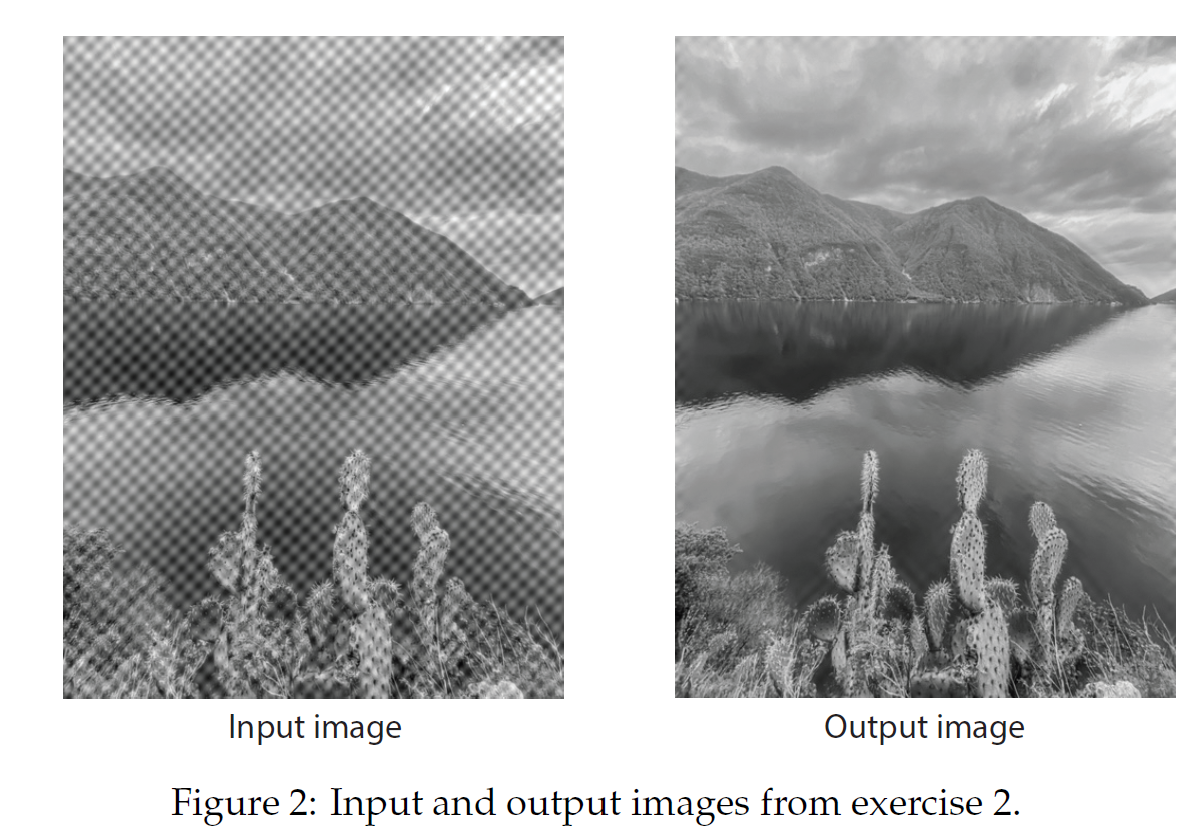

In [74]:
# Define your functions here .- you can include comments in your code explaining the steps of your algorithm

image_path = 'san_domenico.png'
image = Image.open(image_path).convert('L') 
image = np.array(image) / 255.0  

# NOTE: get the FAST FOURIER TRANSFORM of the image in order to move it from spatial doamin to frequency domain
fft_image = np.fft.fft2(image)

# NOTE: here we move low frequencies to the center of the image
fshift = np.fft.fftshift(fft_image)

# NOTE: Magnitude spectrum measures how strong each frequency component is (how much of this frequency is in the image?)
# NOTE: We are able to visualize the image (spectrum)
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1e-8)

# NOTE: get measuraments of the iamge, WIDTH, HEIGHT AND CENTER
rows, cols = image.shape
center_row, center_col = rows // 2 , cols // 2

# NOTE: Initially create a mask with all ones -> means keep everything and then block unwanted frequencies
# NOTE: 1 mean keep and 0 means drop 
mask = np.ones((rows, cols), dtype=np.float32)

# NOTE: definition of the erasing size, changed based on what I see from Frequency space
block_size = 12

# NOTE: This values are changed based on what we are able to see from Frequency space
# NOTE: I.e I can move around the black blocks by looking at the Filtered Spectrum
block_coordinates = [
    (center_row-40, center_col-35), # NOTE: top left block
    (center_row-40, center_col+35),  # NOTE: top right block
    (center_row+40, center_col-35), # NOTE: bottom left block
    (center_row+35, center_col+35), # NOTE: bottom right block
]

# NOTE: Thanks to the mask we are able to erase frequencies we don want 
# NOTE: with this we have a mask with 1's where we want to keep the stuff and 0 where we don't
for (x, y) in block_coordinates:
    mask[x-block_size:x+block_size, y-block_size:y+block_size] = 0

# NOTE: simple multiplication between FT and and mask to effectively remove noise 
filtered = fshift * mask

# NOTE: now to go back to the image we need to apply an INVERSE Fourier Transform 
ishifted = np.fft.ifftshift(filtered)
img_retrieved = np.fft.ifft2(ishifted)
img_retrieved = np.abs(img_retrieved)

###  <span style="color:orange"> _Report_ </span>
<span style="color:orange"> _Report your results below. Explain your technique, show Fourier plots of all the steps, as well as the final image. Use the input image provided with the assignment. Please inline the resulting images with your text explaining the approach (e.g. as figures) so that the report is cohesive._ </span>

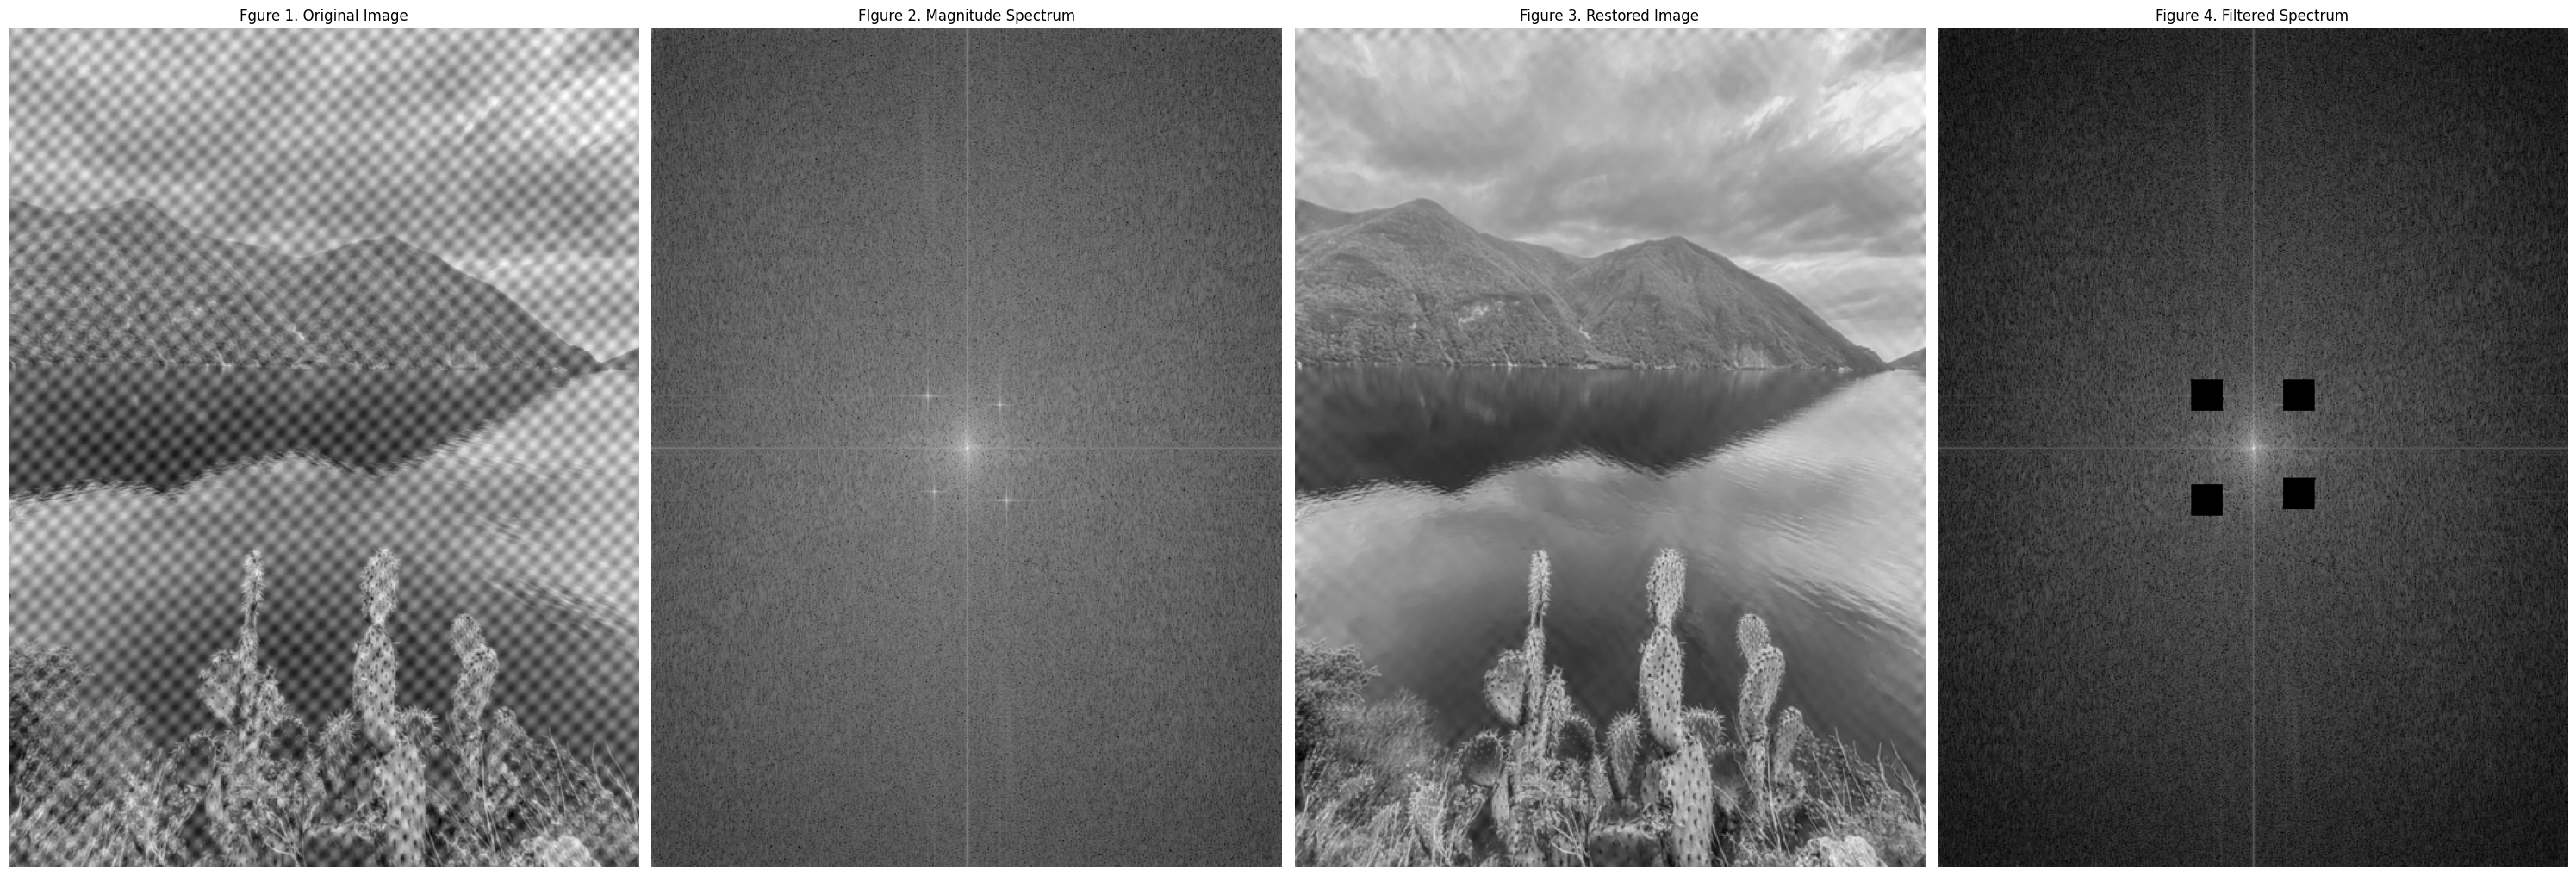

In [75]:
plt.figure(figsize=(30, 12))

plt.subplot(1, 4,1)
plt.imshow(image, cmap='gray')
plt.title('Fgure 1. Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('FIgure 2. Magnitude Spectrum')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(img_retrieved, cmap='gray')
plt.title('Figure 3. Restored Image')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(np.log(1 + np.abs(filtered)), cmap='gray')
plt.title('Figure 4. Filtered Spectrum')
plt.axis('off')

plt.tight_layout()
plt.show()

__The code is already well commented but I will add an explanation here__

When performing a Forurier Transform, what we get back is a frequency spectrum whih contains all the different frequencies of the image. In the spectrum there are both high and low frequencies where the low ones tend to be on the center and the higher ones further from the center close to edges. 

By analyzing the spectrum it is possible to recognise the noise that there is on the image by looking for spots that are very bright as we can see in figure 2. This spots create the noise of Figure 1. Basically random high frequencies.

In order to get rid of them we filter them out, this is why we use a mask which is made of ceratin block size and shifted on specific places on the spectrum in order to erase this random High frequencies. 

To perfectly erase it I looked at the Spectrum, created block big enough to cover the spots, did some trials to shift the mask on top of them and I was able to reconstruct the image!.